# **Sales Prediction using Python**

### Forecasting future sales using historical data and other relevant variables is known as sales prediction. Due to its extensive ecosystem of libraries and tools for data analysis, machine learning, and visualisation, Python is a well-known programming language for using sales prediction models.

## **1. Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **2. Loading the dataset**

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## **3. Analyzing the Dataset**

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **4. Checking whether this dataset contains null values or not**

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### So this dataset does not contain any null values.

## **5. Exploratory Data Analysis**

<AxesSubplot: xlabel='Sales', ylabel='Density'>

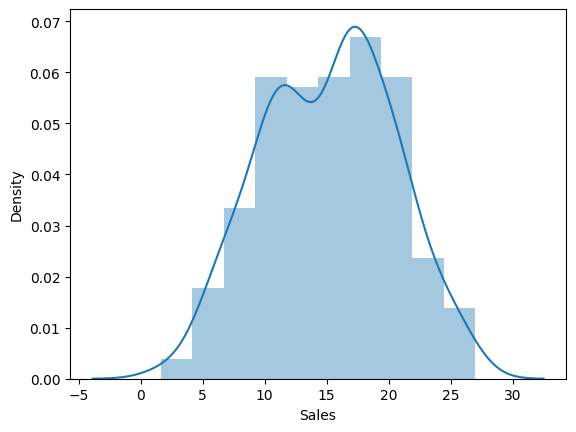

In [9]:
sns.distplot(df.Sales) 

<AxesSubplot: >

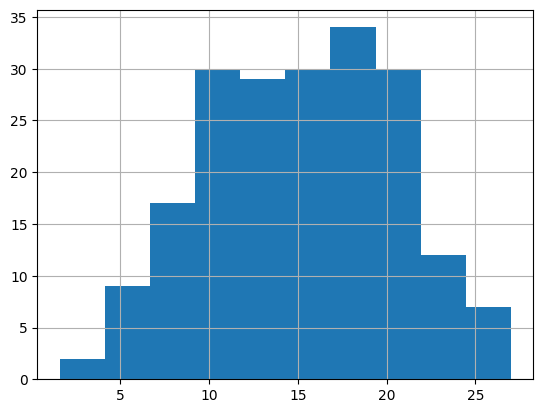

In [10]:
df.Sales.hist()

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

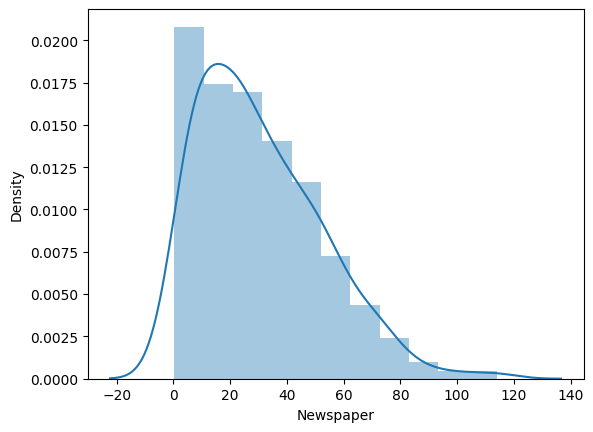

In [11]:
sns.distplot(df.Newspaper)

## **Before we begin training a machine learning model to forecast future sales, let's take a closer look at the correlation between the features:**

In [12]:
#calculating correlations
df.TV.corr(df.Sales)

0.9012079133023305

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


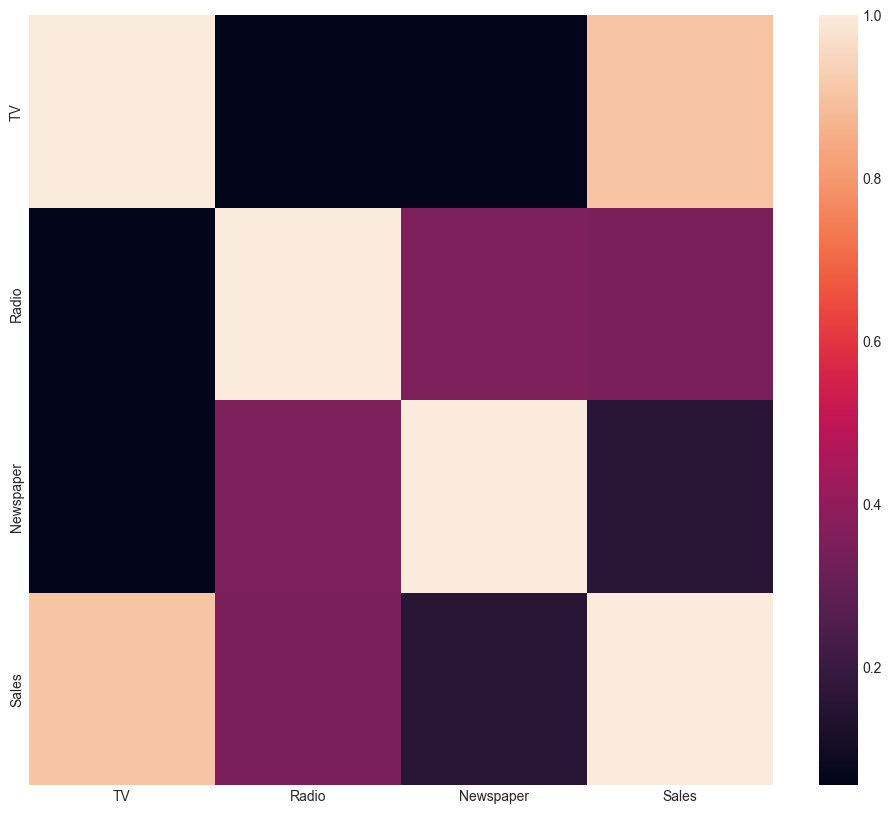

In [14]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())
plt.show()

## **6. Building and training the regression model**

### A machine learning algorithm called linear regression makes predictions about future events using a dependent variable and one or more independent variables. It gauges how closely two variables are related. Of all machine learning algorithms, linear regression analysis is the one that is most frequently used.

### In order to identify and measure the relationship between the variables taken into consideration, linear regression is a statistical test that is applied to a set of data. It is still regarded as one of the most effective algorithms and is easy to use.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

### **Splitting the dataset**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### **Initializing the model**

In [18]:
lr = LinearRegression()

### **Fitting the model**

In [19]:
lr.fit(X_train, Y_train)

LinearRegression()

### **Making predictions**

In [20]:
Y_pred = lr.predict(X_test)

In [22]:
print(lr.coef_)
print(lr.intercept_)

[0.05450927 0.10094536 0.00433665]
4.714126402214129


### **Evaluation**

In [21]:
#Calculating Mean Squared Error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.9077569102710887


In [24]:
lr.score(X_test, Y_test)

0.9059011844150826

### The result we receive is excellent i.e., 0.9059. If the model is given a score of 1, it is extremely accurate. Our model performs very poorly when the value is 0. In conclusion, a score that is close to 1 indicates that the trained model is performing better.

## **7. Predicting the Future Sales**

In [25]:
new_data = pd.DataFrame([[100, 25, 10]])  # Example new advertising data
new_sales_prediction = lr.predict(new_data)
print(f"Predicted Sales for New Data: {new_sales_prediction}")

Predicted Sales for New Data: [12.73205401]


### Here, we use the trained model to predict sales for new advertising data

## **8. Conclusion**

### In this, we've used a simple linear regression model to predict sales based on features like 'TV', 'Radio', and 'Newspaper' advertising spending.

### In conclusion, if you utilise the right methods and best practises, utilising Python for sales prediction may be very productive and efficient. Throughout this project, we made use of a variety of Python modules and tools to preprocess data, create predictive models, and assess their effectiveness. We were successful in obtaining significant insights and precise predictions by adopting a systematic strategy.